In [15]:
cd /Users/krishnapatel/MyDesk/Internship2021

/Users/krishnapatel/MyDesk/Internship2021


In [16]:
# Copying in the zip files from Google Drive (alternately just upload them)
!cp 'image_arrays_train.zip' .
!cp 'image_arrays_test.zip' .

cp: ./image_arrays_train.zip and image_arrays_train.zip are identical (not copied).
cp: ./image_arrays_test.zip and image_arrays_test.zip are identical (not copied).


In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
train = pd.read_csv('Train.csv')
print(train.shape)
train.head()

(2977, 4)


,Field_ID,Year,Quality,Yield
0,MH2O0YH,2019,3,3.686
1,O9TURWL,2019,2,5.657
2,35AFSDD,2019,3,3.082
3,PM05EG9,2019,2,2.707
4,V7PZBCG,2019,2,2.679


Loading image_arrays_train/AYKNNYF.npy as an array
Array shape: (360, 41, 40)


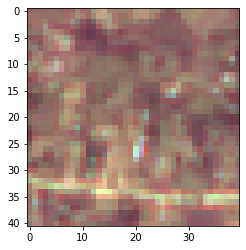

In [19]:
# Look at a sample:
fid = train['Field_ID'].sample().values[0]
fn = f'image_arrays_train/{fid}.npy' # File name based on Field_ID
print(f'Loading {fn} as an array')
arr = np.load(fn) # Loading the data with numpy
print('Array shape:', arr.shape) # 360 bands, images 40 or 41px a side
rgb_jan = np.stack([arr[4], arr[3], arr[2]], axis=-1) # Combine three bands for viewing
rgb_jan = rgb_jan / np.max(rgb_jan) # Scale band values to (0, 1) for easy image display
plt.imshow(rgb_jan) # View with matplotlib

In [20]:
band_names = [l.strip() for l in open('bandnames.txt', 'r').readlines()]
#print(band_names)

# Getting the dataframes of band 4 and band 8

In [21]:
new_band_names1 = ['B4']
new_band_names2 = ['B8']

In [22]:
def process_im1(fid, folder='image_arrays_train'):
  fn = f'{folder}/{fid}.npy'
  arr = np.load(fn)
  #bands_of_interest = ['S2_B5', 'S2_B4', 'S2_B3', 'S2_B2', 'CLIM_pr', 'CLIM_soil']
  bands_of_interest = new_band_names1
  values = {}
  for month in range(12):
    bns = [str(month) + '_' + 'S2'+ '_'+ b for b in bands_of_interest] # Bands of interest for this month 
    idxs = np.where(np.isin(band_names, bns)) # Index of these bands
    vs = arr[idxs, 20, 20] # Sample the im at the center point
    for bn, v in zip(bns, vs[0]):
      values[bn] = v
  return values

In [23]:
def process_im2(fid, folder='image_arrays_train'):
  fn = f'{folder}/{fid}.npy'
  arr = np.load(fn)
  #bands_of_interest = ['S2_B5', 'S2_B4', 'S2_B3', 'S2_B2', 'CLIM_pr', 'CLIM_soil']
  bands_of_interest = new_band_names2
  values = {}
  for month in range(12):
    bns = [str(month) + '_' + 'S2'+ '_'+ b for b in bands_of_interest] # Bands of interest for this month 
    idxs = np.where(np.isin(band_names, bns)) # Index of these bands
    vs = arr[idxs, 20, 20] # Sample the im at the center point
    for bn, v in zip(bns, vs[0]):
      values[bn] = v
  return values

# Dataframe of Band4

In [10]:
# Make a new DF with the sampled values from each field 
train_sampled_B4 = pd.DataFrame([process_im1(fid) for fid in train['Field_ID'].values])

# Add in the field ID and yield
train_sampled_B4['Field_ID'] = train['Field_ID'].values
train_sampled_B4['Yield'] = train['Yield'].values
train_sampled_B4.head()

,0_S2_B4,1_S2_B4,2_S2_B4,3_S2_B4,4_S2_B4,5_S2_B4,6_S2_B4,7_S2_B4,8_S2_B4,9_S2_B4,10_S2_B4,11_S2_B4,Field_ID,Yield
0,1173,1397,1518,1455,1449,6432,360,1272,1155,903,690,393,MH2O0YH,3.686
1,924,1011,1020,2178,916,506,679,679,943,817,512,323,O9TURWL,5.657
2,1357,1588,1346,1426,1460,8875,491,552,764,796,929,3598,35AFSDD,3.082
3,639,823,916,973,844,570,1135,2781,501,581,537,8025,PM05EG9,2.707
4,1162,1133,1542,1046,507,534,644,882,698,694,657,789,V7PZBCG,2.679


# Dataframe of Band8

In [11]:
# Make a new DF with the sampled values from each field 
train_sampled_B8 = pd.DataFrame([process_im2(fid) for fid in train['Field_ID'].values])

# Add in the field ID and yield
train_sampled_B8['Field_ID'] = train['Field_ID'].values
train_sampled_B8['Yield'] = train['Yield'].values
train_sampled_B8.head()

,0_S2_B8,1_S2_B8,2_S2_B8,3_S2_B8,4_S2_B8,5_S2_B8,6_S2_B8,7_S2_B8,8_S2_B8,9_S2_B8,10_S2_B8,11_S2_B8,Field_ID,Yield
0,2038,2095,2084,1951,2031,6944,1346,2740,1862,2642,2373,1845,MH2O0YH,3.686
1,1951,1695,1758,2906,1983,2307,3673,2453,1908,2126,3818,891,O9TURWL,5.657
2,2137,2381,1780,1971,2097,9601,4262,2790,2670,2463,3163,4173,35AFSDD,3.082
3,2588,2582,2406,2242,2210,3136,2939,3226,3262,3036,2716,8648,PM05EG9,2.707
4,2603,2230,2949,2890,3621,3261,3243,2699,3229,3179,2696,3455,V7PZBCG,2.679


# Normalising the Data

In [12]:
from sklearn import preprocessing
train_sampled1_B4 = train_sampled_B4
train_sampled1_B8 = train_sampled_B8
train_sampled1_B4 = train_sampled1_B4.drop(columns = ['Field_ID','Yield'])
train_sampled1_B8 = train_sampled1_B8.drop(columns = ['Field_ID','Yield'])

import pandas as pd
from sklearn import preprocessing

x = train_sampled1_B4.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
band4 = pd.DataFrame(x_scaled)

y = train_sampled1_B8.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
band8 = pd.DataFrame(y_scaled) 

In [13]:
#band8

# Calculating NDVI

In [14]:
ndvi = band4
for col in ndvi.columns:
    ndvi[col].values[:] = 0

In [29]:
#ndvi = (nir-red)/(nir+red)
nir = band4
red = band8
for j in range(12):
    for i in range(len(band4)):
        ndvi[j][i] = (nir[j][i]-red[j][i])/(nir[j][i]+red[j][i])
        #print(ndvi[j][i])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


# Values of NDVI

In [30]:
ndvi

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.722482,0.782316,0.812195,0.800249,0.787664,0.726491,0.893841,0.748879,0.831883,0.740840,0.772599,0.797200
1,0.729151,0.816742,0.841531,0.741800,0.791481,0.800260,0.727861,0.765470,0.827912,0.772938,0.712155,0.920169
2,0.716476,0.762683,0.839386,0.798632,0.782605,0.830773,0.714026,0.746330,0.774129,0.750506,0.729836,0.707124
3,0.707507,0.751051,0.787909,0.778533,0.774436,0.751833,0.757853,0.727979,0.745385,0.724383,0.750719,0.931734
4,0.707670,0.772573,0.755868,0.742501,0.714615,0.746370,0.743518,0.751042,0.746733,0.719900,0.751846,0.713674
...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0.713613,0.744351,0.843602,0.801147,0.934826,0.768041,0.804508,0.790534,0.771808,0.708092,0.733953,0.728291
2973,0.714326,0.748622,0.809503,0.735860,0.711571,0.728288,0.796477,0.750935,0.776387,0.716579,0.727761,0.731938
2974,0.707307,0.797235,0.859336,0.810628,0.732117,0.748287,0.792418,0.793305,0.800620,0.745897,0.759169,0.746629
2975,0.724574,0.731074,0.765696,0.760020,0.716711,0.749244,0.739417,0.726889,0.746981,0.716216,0.726140,0.727320
